# Task 4: SALES PREDICTION USING PYTHON

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


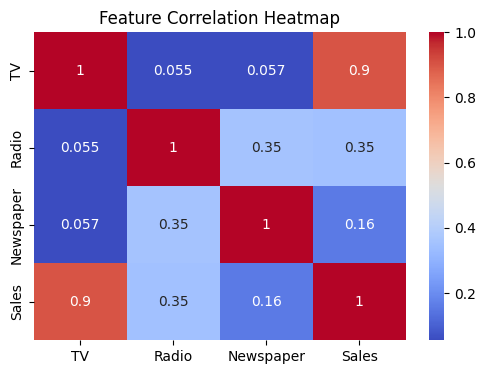

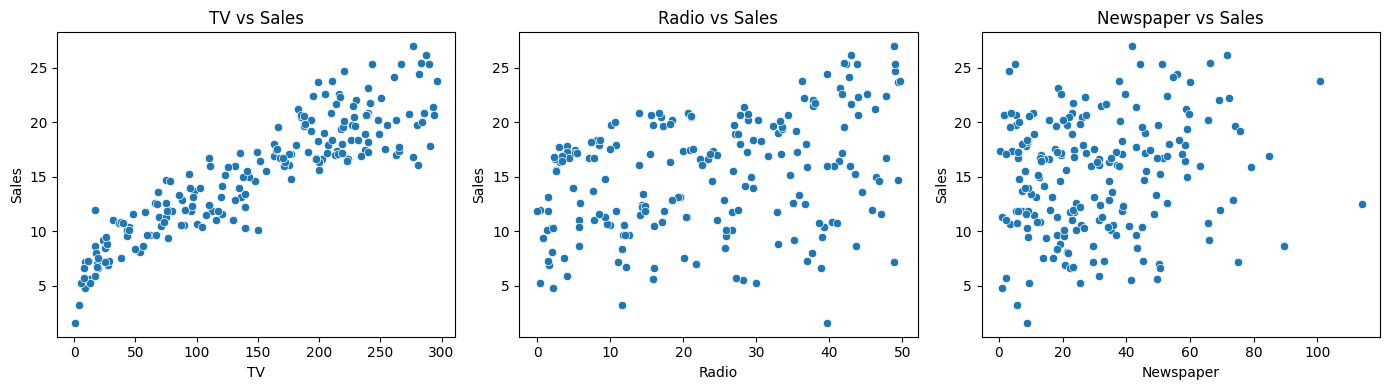


✅ R² Score: 0.9059
✅ MAE: 1.2748
✅ MSE: 2.9078
✅ RMSE: 1.7052


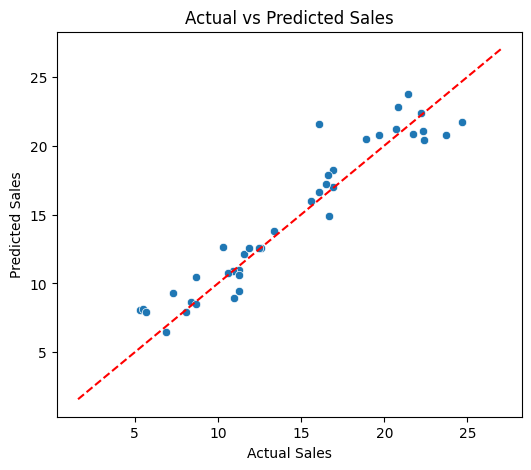

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Load the Excel file
df = pd.read_excel("/content/advertising(1).csv.xlsx")

# 2. View the dataset
print(df.head())
print(df.info())

# 3. Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 4. Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Scatter plots
plt.figure(figsize=(14, 4))
for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['Sales'])
    plt.title(f"{feature} vs Sales")
plt.tight_layout()
plt.show()

# 6. Prepare features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 9. Predict
y_pred = model.predict(X_test)

# 10. Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\n✅ R² Score: {r2:.4f}")
print(f"✅ MAE: {mae:.4f}")
print(f"✅ MSE: {mse:.4f}")
print(f"✅ RMSE: {rmse:.4f}")

# 11. Actual vs Predicted plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
